In [29]:
from TPNN.tools.CNNarchitecture import *
from TPNN.tools.optimizers import Adam
import numpy as np

## Reduce Data

In [1]:
from enum import Enum

test_data_folder = "../data_sets/mnist/test_data/"
train_data_folder = "../data_sets/mnist/train_data/"

class Mode(Enum):
    TRAIN = 0
    TEST = 1

# return folder name of 'number's pictures
def get_folder_name(number, mode: Mode):
    assert 0 <= number <= 9
    if mode == Mode.TRAIN:
        return train_data_folder + str(number) + "/"
    elif mode == Mode.TEST:
        return test_data_folder + str(number) + "/"
    else:
        assert False

# i'th item of array - folder of number i
train_folders_names = []
test_folders_names = []

for i in range(10):
    train_folders_names.append(get_folder_name(i, Mode.TRAIN))
    test_folders_names.append(get_folder_name(i, Mode.TEST))
print('train:')
print(train_folders_names)
print("---" * 5)
print('test:')
print(test_folders_names)

train:
['../data_sets/mnist/train_data/0/', '../data_sets/mnist/train_data/1/', '../data_sets/mnist/train_data/2/', '../data_sets/mnist/train_data/3/', '../data_sets/mnist/train_data/4/', '../data_sets/mnist/train_data/5/', '../data_sets/mnist/train_data/6/', '../data_sets/mnist/train_data/7/', '../data_sets/mnist/train_data/8/', '../data_sets/mnist/train_data/9/']
---------------
test:
['../data_sets/mnist/test_data/0/', '../data_sets/mnist/test_data/1/', '../data_sets/mnist/test_data/2/', '../data_sets/mnist/test_data/3/', '../data_sets/mnist/test_data/4/', '../data_sets/mnist/test_data/5/', '../data_sets/mnist/test_data/6/', '../data_sets/mnist/test_data/7/', '../data_sets/mnist/test_data/8/', '../data_sets/mnist/test_data/9/']


In [10]:
import os


def get_train_files_count(names):
    return len(os.listdir(names[0]))

def get_test_files_count(names):
    return len(os.listdir(names[0]))

def print_files_count(train_folders, test_folders):
    print("train:")

    for i in range(len(train_folders)):
        name = train_folders[i]
        print("[" + str(i) + "] - " + str(len(os.listdir(name))))

    print("test:")

    for i in range(len(test_folders)):
        name = test_folders[i]
        print("[" + str(i) + "] - " + str(len(os.listdir(name))))

print_files_count(train_folders_names, test_folders_names)

print("train files count=" + str(get_train_files_count(train_folders_names)))
print("test files count=" + str(get_test_files_count(test_folders_names)))

In [11]:
from random import sample

reduce_coefficient = 10

def reduce_files_count(red_coeff, dir_name):
    files = os.listdir(dir_name)
    files_count = len(files)

    remove_count = files_count - files_count // red_coeff

    for file_name in sample(files, remove_count):
        os.remove(dir_name + file_name)

def reduce_datasets(red_coeff, train_folders, test_folders):
    for dir_name in train_folders:
        reduce_files_count(red_coeff, dir_name)
    for dir_name in test_folders:
        reduce_files_count(red_coeff, dir_name)

need_reduce = False

if need_reduce:
    reduce_datasets(reduce_coefficient, train_folders_names, test_folders_names)

print_files_count(train_folders_names, test_folders_names)
print(get_train_files_count(train_folders_names))
print(get_test_files_count(test_folders_names))

train:
[0] - 100
[1] - 100
[2] - 100
[3] - 100
[4] - 100
[5] - 100
[6] - 100
[7] - 100
[8] - 100
[9] - 100
test:
[0] - 20
[1] - 20
[2] - 20
[3] - 20
[4] - 20
[5] - 20
[6] - 20
[7] - 20
[8] - 20
[9] - 20
100
20


## Construct dataset

In [27]:
from PIL import Image
import random

# rename images in specified format: i_j.jpj (i - number on image, j - number of image in directory)
def rename_images(dir_names):
    for i in range(len(dir_names)):
        dir_name = dir_names[i]
        file_names = os.listdir(dir_name)

        for j in range(len(file_names)):
            file_name = file_names[j]
            os.rename(dir_name + file_name, dir_name + str(i) + "_" + str(j) + ".jpj")

# returns all images names from directories from 'dir_names'
# images names are shuffled
def get_shuffled_im_names(dir_names):
    all_file_names = []

    for dir_name in dir_names:
        file_names = os.listdir(dir_name)

        for file_name in file_names:
            all_file_names.append(dir_name + file_name)
    random.shuffle(all_file_names)

    return all_file_names

# build dataset from images which names are from 'data_file_names'
def build_input_dataset(data_file_names):
    dataset = []

    for file_name in data_file_names:
        im_data = np.array(Image.open(file_name))
        assert im_data.shape == (28, 28)
        dataset.append(im_data)

    return np.array(dataset)

# return corresponding one hot encoding vector to number
def get_one_hot_encoding(number: int):
    assert 9 >= number >= 0
    result = np.zeros((10, ))
    result[number] = 1

    return result

# return one hot encoding vectors for image dataset
def build_dst_dataset(data_file_names):
    one_hot_encoding_dataset = []

    for file_name in data_file_names:
        tokens = file_name.split("/")
        count = len(tokens)
        name = tokens[count - 1]

        number = int(name.split("_")[0])
        one_hot_encoding_dataset.append(get_one_hot_encoding(number))

    return np.array(one_hot_encoding_dataset)

In [ ]:
need_rename = False

if need_rename:
    rename_images(train_folders_names)
    rename_images(test_folders_names)

In [25]:
train_file_names = get_shuffled_im_names(train_folders_names)
test_file_names = get_shuffled_im_names(test_folders_names)

print("train images count - " + str(len(train_file_names)))
print("test images count - " + str(len(test_file_names)))
print("check shuffle:")
print(train_file_names[0:3])
print(test_file_names[0:3])

train images count - 1000
test images count - 200
check shuffle:
['../data_sets/mnist/train_data/2/2_90.jpj', '../data_sets/mnist/train_data/9/9_12.jpj', '../data_sets/mnist/train_data/5/5_98.jpj']
['../data_sets/mnist/test_data/1/1_14.jpj', '../data_sets/mnist/test_data/5/5_16.jpj', '../data_sets/mnist/test_data/8/8_17.jpj']


In [30]:
input_train_dataset = build_input_dataset(train_file_names)
output_train_dataset = build_dst_dataset(train_file_names)

input_test_dataset = build_input_dataset(test_file_names)
output_test_dataset = build_dst_dataset(test_file_names)

print("train input shape=" + str(input_train_dataset.shape))
print("train output shape=" + str(output_train_dataset.shape))
print("test input shape=" + str(input_test_dataset.shape))
print("train input shape=" + str(output_test_dataset.shape))

train input shape=(1000, 28, 28)
train output shape=(1000, 10)
test input shape=(200, 28, 28)
train input shape=(200, 10)


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


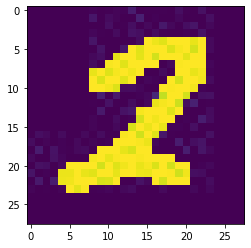

In [33]:
# check conformity of picture and one-hot-encoding vector
import matplotlib.pyplot as plt
plt.imshow(input_train_dataset[0])

print(output_train_dataset[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


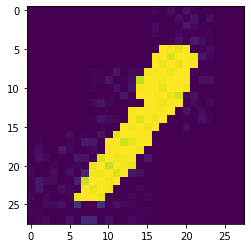

In [39]:
plt.imshow(input_test_dataset[0])
print(output_test_dataset[0])

## reshape and normalize dataset

In [34]:
in_tr_sh = input_train_dataset.shape
in_tst_sh = input_test_dataset.shape

input_train_dataset = input_train_dataset.reshape(in_tr_sh[0], 1, in_tr_sh[1], in_tr_sh[2])
input_test_dataset = input_test_dataset.reshape(in_tst_sh[0], 1, in_tst_sh[1], in_tst_sh[2])

input_train_dataset = input_train_dataset / 255
input_test_dataset = input_test_dataset / 255

print(input_train_dataset.shape)
print(input_test_dataset.shape)

(1000, 1, 28, 28)
(200, 1, 28, 28)


pixel value=0.984313725490196


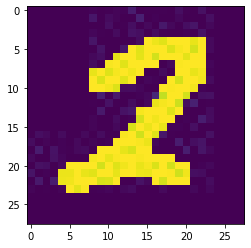

In [37]:
print("pixel value=" + str(input_train_dataset[0][0][10][10]))
plt.imshow(input_train_dataset[0][0])

## Construct AlexNet

In [ ]:
"""""
cnnLayer1 = CNNlayer((1,28,28), RELU, 5, (5,5), 1)
maxPooling1 = MaxPoolingLayer((2,2), cnnLayer1.output_shape)
cnnLayer2 = CNNlayer(maxPooling1.output_shape, RELU, 10, (3,3), 1)
maxPooling2 = MaxPoolingLayer((2,2), cnnLayer2.output_shape)
reformatLayer = ReformatLayer(maxPooling2.output_shape)
dense1 = DenseLayer(RELU, 50, reformatLayer.output_shape[0])
dense2 = DenseLayer(th, 10, dense1.output_shape[0])
softmaxLayer = SoftmaxLayer(10)

net = Net()
net.set_optimizer(Adam())
net.add_layer(cnnLayer1)
net.add_layer(maxPooling1)
net.add_layer(cnnLayer2)
net.add_layer(maxPooling2)
net.add_layer(reformatLayer)
net.add_layer(dense1)
net.add_layer(dense2)
net.add_layer(softmaxLayer)
"""""

In [ ]:
cnnLayer = CNNlayer((1,28,28), RELU, 5, (5,5), 1)
maxPooling = MaxPoolingLayer((4,4), cnnLayer.output_shape)
reformatLayer = ReformatLayer(maxPooling.output_shape)
dense = DenseLayer(th, 10, reformatLayer.output_shape[0])
softmaxLayer = SoftmaxLayer(10)

net = Net()
net.set_optimizer(Adam())
net.add_layer(cnnLayer)
net.add_layer(maxPooling)
net.add_layer(reformatLayer)
net.add_layer(dense)
net.add_layer(softmaxLayer)

In [ ]:
net.train(Data(x_train, train_dst_vectors), 10)